In [23]:
# file = "/Users/timliu/Documents/on the desktop/MSc BA/論文/ARP/Life groups & Retail life/AGN NA/20150513_Aegon_NV-_Earnings_Call_2015-5-13_FS000000002567987335.pdf"

# with open(file, "rb") as f:
#     pdf = pdftotext.PDF(f)
# # Save all text to a txt file.
# with open(file.replace(".pdf", ".txt"), "w") as f:
#     f.write("\n\n".join(pdf))
# # open the text file
# with open(file.replace(".pdf", ".txt")) as f:
#     contents = f.readlines()
#     df_clean = cleaning_text(contents)    ##### here we use the function from data_cleaning.py
    
#     index_presentation = df_clean[df_clean[0] == 'Presentation'].index
#     if len(index_presentation) == 2:
#         df_clean.loc[index_presentation[0], 0] = 'heading' # replace the first index_presentation in df_clean with "head" # interacting with the participant_function.py

#     # extract the participants
#     # tmp_df_text,tmp_company_paticipants,tmp_other_paticipants = participants_list(df_clean) ##### here we use the function from participant_function.py

# df = df_clean.copy()

# # # drop the Questions And Answers and the following rows
# # QA_index = df.index[df.iloc[:,0] == 'Questions And Answers'].tolist()
# # # get the index of the last row of df
# # end_index = [len(df)]
# # if QA_index == []:
# #     QA_index = df.index[df.iloc[:,0] == 'Q&A'].tolist()
# #     end_index = [len(df)]
# #     if QA_index == []:
# #         # get the index of the last row of df
# #         end_index = []

# # # QA_index = []
# # # end_index = []
# # if QA_index != []:
# #     test = df.drop(df.index[QA_index[0]:end_index[0]])
# # test

In [1]:
# self-define function
from data_cleaning import cleaning_text, sentence_df
from participant_function import participants_list, clean_participants_list
from stock_price_info import stock_price_change

# read and saving path
path = "/Users/timliu/Documents/GitHub/BoE_ARP_model/meeting_transcript"
save_path = "/Users/timliu/Documents/GitHub/BoE_ARP_model/output"

# path = "/Users/hienanh/Documents/GitHub/final_01/Transcript_test"
# save_path = "/Users/hienanh/Documents/GitHub/final_01/Output"

# other packages
import pdftotext
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import string
# from collections import Counter
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
# from sklearn.linear_model import LogisticRegression

import nltk 
nltk.download('twitter_samples')
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords          # module for stop words that come with NLTK
nltk.download('stopwords')
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/timliu/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/timliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# all files path
company_paths = []
sectors = os.listdir(path) 
if '.DS_Store' in sectors:
    sectors.remove('.DS_Store')

for sector in sectors:
    # path to each sector files
    sector_path = path+"/"+sector
    
    # path to each company files
    companies = os.listdir(sector_path)
    if '.DS_Store' in companies:
        companies.remove('.DS_Store')
    
    for company in companies:
        tmp = sector_path+"/"+company
        company_paths.append(tmp)

In [3]:
# # checking with DF (not necessary)
# company_paticipants_df = pd.DataFrame()
# other_paticipants_df = pd.DataFrame()

df_clean_na = pd.DataFrame(np.zeros((2500,1)), columns=['index']) # create a dataframe with 2500 rows
# all_participants = []      
company_paticipants_list = [] 
other_paticipants_list = []

for single_path in company_paths:
    files = os.listdir(single_path)
    for file in files:
        # print(file)
        if file.endswith(".pdf"):
            print(file)
            # Load PDF
            with open(single_path+"/"+file, "rb") as f:
                pdf = pdftotext.PDF(f)
            # Save all text to a txt file.
            with open(save_path+"/"+file.replace(".pdf", ".txt"), "w") as f:
                f.write("\n\n".join(pdf))
            # open the text file
            with open(save_path+"/"+file.replace(".pdf", ".txt")) as f:
                contents = f.readlines()
                df_clean = cleaning_text(contents)    ##### here we use the function from data_cleaning.py
                
                # extract the participants
                tmp_df_text,tmp_company_paticipants,tmp_other_paticipants = participants_list(df_clean) ##### here we use the function from participant_function.py
                company_paticipants_list.append(tmp_company_paticipants)
                other_paticipants_list.append(tmp_other_paticipants)
                
                # drop the Questions And Answers and the following rows
                QA_index = df_clean.index[df_clean.iloc[:,0] == 'Questions And Answers'].tolist()
                # get the index of the last row of df
                end_index = [len(df_clean)]
                if QA_index == []:
                    QA_index = df_clean.index[df_clean.iloc[:,0] == 'Q&A'].tolist()
                    end_index = [len(df_clean)]
                    if QA_index == []:
                        # get the index of the last row of df
                        end_index = []
                
                if QA_index != []:
                    df_clean = df_clean.drop(df_clean.index[QA_index[0]:end_index[0]])
                df_clean = df_clean.reset_index(drop=True)                       

                index_presentation = df_clean[df_clean[0] == 'Presentation'].index
                if len(index_presentation) == 2:
                    df_clean.loc[index_presentation[0], 0] = 'heading' # replace the first index_presentation in df_clean with "head" # interacting with the participant_function.py
                

                # # checking with DF (not necessary)
                # company_paticipants = pd.DataFrame(company_paticipants)
                # if company_paticipants.empty:
                #     company_paticipants = pd.DataFrame(np.zeros((1,1)), columns=['index'])
                # company_paticipants_df[f"{files[files.index(file)]}"] = company_paticipants
                # other_paticipants = pd.DataFrame(other_paticipants)
                # if other_paticipants.empty:
                #     other_paticipants = pd.DataFrame(np.zeros((1,1)), columns=['index'])
                # other_paticipants_df[f"{files[files.index(file)]}"] = other_paticipants
                
                df = pd.DataFrame()
                df[f"{files[files.index(file)]}"] = tmp_df_text
                # remove the row using re, if the row ends with Presentation  Investor Day	
                df_clean_na[f"{files[files.index(file)]}"] = df[f"{files[files.index(file)]}"].dropna(inplace=False).reset_index(drop=True)

# drop the first column of the df
df_clean_na = df_clean_na.iloc[:,1:]
df_clean_na.head(5)
# error_file: '/Users/timliu/Documents/GitHub/BoE_ARP_model/meeting_transcript/Other Insurers/SANPO FH/20180808_Sampo_Oyj-_Earnings_Call_2018-8-8_DN000000002453826008.pdf'

20190312_Quilter_PLC-_Earnings_Call_2019-3-12_RT000000002903022737.pdf
20210811_Quilter_PLC-_Earnings_Call_2021-8-11_RT000000002962310912.pdf


/Users/timliu/Documents/GitHub/BoE_ARP_model/data_cleaning.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[0] = df[0].str.replace('*','')
/Users/timliu/Documents/GitHub/BoE_ARP_model/data_cleaning.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[0] = df[0].str.replace('[','')
/Users/timliu/Documents/GitHub/BoE_ARP_model/data_cleaning.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[0] = df[0].str.replace(']','')


20200311_Quilter_PLC-_Earnings_Call_2020-3-11_DN000000002822346246.pdf
20200811_Quilter_PLC-_Earnings_Call_2020-8-11_DN000000002883967732.pdf
20190805_Quilter_PLC-_Earnings_Call_2019-8-5_RT000000002897819838.pdf
20180808_Quilter_PLC-_Earnings_Call_2018-8-8_FS000000002459369907.pdf
20210401_Quilter_PLC-_M-A_Call_2021-4-1_RT000000002954187686.pdf
20171219_Quilter_PLC-_M-A_Call_2017-12-19_SD000000002919419964.pdf
20210310_Quilter_PLC-_Earnings_Call_2021-3-10_RT000000002952420637.pdf
20140904_Sanlam_Ltd-_Earnings_Call_2014-9-4_DN000000002170588806.pdf
20140604_Sanlam_Ltd-_Sales_Results_Call_2014-6-4_DN000000002147084411.pdf
20211208_Sanlam_Ltd-_Sales_Results_Call_2021-12-8_RT000000002970564782.pdf
20181031_Sanlam_Ltd-_Guidance_Call_2018-10-31_SD000000002901840988.pdf
20170907_Sanlam_Ltd-_Earnings_Call_2017-9-7_DN000000002371353550.pdf
20170607_Sanlam_Ltd-_Sales_Results_Call_2017-6-8_FS000000002475400468.pdf
20180606_Sanlam_Ltd-_Guidance_Call_2018-6-6_SD000000002905589819.pdf
20201209_Sanla

/var/folders/sq/sxhsy98j6f57m406rd5lz1_r0000gn/T/ipykernel_96115/2282825205.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean_na[f"{files[files.index(file)]}"] = df[f"{files[files.index(file)]}"].dropna(inplace=False).reset_index(drop=True)


20210812_Aviva_PLC-_Earnings_Call_2021-8-12_DN000000002962406419.pdf
20210527_Aviva_PLC-_Sales_Results_Call_2021-5-27_SD000000002958073942.pdf
20180308_Aviva_PLC-_Earnings_Call_2018-3-8_SD000000002902650477.pdf
20211111_Aviva_PLC-_Sales_Results_Call_2021-11-11_DN000000002967884425.pdf
20191120_Aviva_PLC-_Guidance_Call_2019-11-20_SD000000002903085152.pdf
20151029_Aviva_PLC-_Sales_Results_Call_2015-10-29_FS000000002237412488.pdf
20120308_Aviva_PLC-_Earnings_Call_2012-3-8_SD000000002751473834.pdf
20160804_Aviva_PLC-_Earnings_Call_2016-8-4_FS000000002423330467.pdf
20200305_Aviva_PLC-_Earnings_Call_2020-3-5_DN000000002803389869.pdf
20150806_Aviva_PLC-_Earnings_Call_2015-8-6_FS000000002423330383.pdf
20130307_Aviva_PLC-_Earnings_Call_2013-3-7_SD000000002751476780.pdf
20140807_Aviva_PLC-_Earnings_Call_2014-8-7_FS000000002423330353.pdf
20140709_Aviva_PLC-_Shareholder_Mtg_Call_2014-7-9_FS000000002484152926.pdf
20171130_Aviva_PLC-_Guidance_Call_2017-11-30_SD000000002902599292.pdf
20190606_Aviva_P

,20190312_Quilter_PLC-_Earnings_Call_2019-3-12_RT000000002903022737.pdf,20210811_Quilter_PLC-_Earnings_Call_2021-8-11_RT000000002962310912.pdf,20200311_Quilter_PLC-_Earnings_Call_2020-3-11_DN000000002822346246.pdf,20200811_Quilter_PLC-_Earnings_Call_2020-8-11_DN000000002883967732.pdf,20190805_Quilter_PLC-_Earnings_Call_2019-8-5_RT000000002897819838.pdf,20180808_Quilter_PLC-_Earnings_Call_2018-8-8_FS000000002459369907.pdf,20210401_Quilter_PLC-_M-A_Call_2021-4-1_RT000000002954187686.pdf,20171219_Quilter_PLC-_M-A_Call_2017-12-19_SD000000002919419964.pdf,20210310_Quilter_PLC-_Earnings_Call_2021-3-10_RT000000002952420637.pdf,20140904_Sanlam_Ltd-_Earnings_Call_2014-9-4_DN000000002170588806.pdf,...,20140424_Everest_Re_Group_Ltd-_Earnings_Call_2014-4-24_SD000000002701577115.pdf,20211028_Everest_Re_Group_Ltd-_Earnings_Call_2021-10-28_DN000000002966766153.pdf,20170207_Everest_Re_Group_Ltd-_Earnings_Call_2017-2-7_FS000000002327179820.pdf,20160204_Everest_Re_Group_Ltd-_Earnings_Call_2016-2-4_FS000000002251252548.pdf,20140724_Everest_Re_Group_Ltd-_Earnings_Call_2014-7-24_FS000000002439093631.pdf,20171031_Everest_Re_Group_Ltd-_Earnings_Call_2017-10-31_DN000000002379633496.pdf,20150428_Everest_Re_Group_Ltd-_Earnings_Call_2015-4-28_FS000000002207058997.pdf,20120726_Everest_Re_Group_Ltd-_Earnings_Call_2012-7-26_SD000000002701554249.pdf,20121025_Everest_Re_Group_Ltd-_Earnings_Call_2012-10-25_SD000000002719409327.pdf,20130724_Everest_Re_Group_Ltd-_Earnings_Call_2013-7-24_SD000000002719418375.pdf
0,Company Ticker QLT L N Equity,Company Ticker QLT L N Equity,Company Ticker QLT L N Equity,Company Ticker QLT L N Equity,Company Ticker QLT L N Equity,Company Ticker QLT L N Equity,Company Ticker QLT L N Equity,Company Ticker QLT L N Equity,Company Ticker QLT L N Equity,Company Ticker SL M SJ Equity,...,Company Ticker RE US Equity,Company Ticker RE US Equity,Company Ticker RE US Equity,Company Ticker RE US Equity,Company Ticker RE US Equity,Company Ticker RE US Equity,Company Ticker RE US Equity,Company Ticker RE US Equity,Company Ticker RE US Equity,Company Ticker RE US Equity
1,Date 2019-03-12,Date 2021-08-11,Date 2020-03-11,Date 2020-08-11,Date 2019-08-05,Date 2018-08-08,Date 2021-04-01,Date 2017-12-19,Date 2021-03-10,Date 2014-09-04,...,Date 2014-04-24,Date 2021-10-28,Date 2017-02-07,Date 2016-02-04,Date 2014-07-24,Date 2017-10-31,Date 2015-04-28,Date 2012-07-26,Date 2012-10-25,Date 2013-07-24
2,Y 2018 Earnings Call,S1 2021 Earnings Call,Y 2019 Earnings Call,S1 2020 Earnings Call,S1 2019 Earnings Call,Q2 2018 Earnings Call,Business Update Call,Old Mutual PLC Sale of Single Strategy Asset,Y 2020 Earnings Call,S1 2014 Earnings Call,...,Q1 2014 Earnings Call,Q3 2021 Earnings Call,Q4 2016 Earnings Call,Q4 2015 Earnings Call,Q2 2014 Earnings Call,Q3 2017 Earnings Call,Q1 2015 Earnings Call,Q2 2012 Earnings Call,Q3 2012 Earnings Call,Q2 2013 Earnings Call
3,Paul Feeney,Paul Feeney,Paul Feeney,Paul Feeney,Paul Feeney,Paul W. Feeney,Operator,Management Business of Old Mutual Wealth to TA,Operator,Johan van Zyl,...,Operator,Operator,Operator,Operator,Operator,Operator,Operator,Operator,Operator,Operator
4,Good morning everybody. Welcome to our First F...,"Hello, and good morning, everyone. Thank you f...","Good morning, everybody. We'll follow the usua...","Good morning, everyone. And you'll understand ...","Good morning, everyone. Welcome to those of yo...",Welcome to our first results presentation as a...,(Call Starts Abruptly) This conference call is...,Associates,"Good morning, everyone. Given the circumstance...",Welcome to our Interim Results Presentation. A...,...,"Good morning, everyone and welcome to the Ever...",Welcome to the Everest Re Group Earnings Confe...,"Good day, everyone. Welcome to the Fourth Quar...","Good day, and welcome to the fourth quarter 20...","Good day, everyone and welcome to the Second Q...","Good day, everyone. Welcome to the Third Quart...","Good day, everyone, and welcome to the First Q...","Good day, everyone. Welcome to 

In [4]:
# generating all the participants
company_paticipants_list = clean_participants_list(company_paticipants_list)
other_paticipants_list = clean_participants_list(other_paticipants_list)
all_participants_list_tmp = []
all_participants_list_tmp = company_paticipants_list + other_paticipants_list

# drop the duplicates
all_participants_list = []
for x in all_participants_list_tmp:
    if x not in all_participants_list:
        all_participants_list.append(x)


In [5]:
concat_df = pd.DataFrame()
participants_index =pd.DataFrame(np.zeros((2500,1)), columns=['index'])
for column in df_clean_na.columns:
    # identify all the rows in df with all_participants_list in it
    both_participants_row_index = df_clean_na[df_clean_na[column].isin(all_participants_list)].index.tolist()
    # apply the both_participants_row_index to the df_clean_na['participants']
    concat_df[column] = df_clean_na[column]
    ppt_list = df_clean_na[column].apply(lambda x: x if x in all_participants_list else 0)
    idx_list = [int(idx) if ppt_list[idx] != 0 else np.nan for idx in range(len(ppt_list)) ]
    # adding paricipants name
    concat_df[f"participants_{column}"] = [name if name != 0 else np.nan for name in ppt_list]
    # adding index columns
    concat_df[f"idx_{column}"] = idx_list
    # fill the NaN with the value of the previous row
    concat_df[f"participants_{column}"] = concat_df[f"participants_{column}"].fillna(method='ffill')
    concat_df[f"idx_{column}"] = concat_df[f"idx_{column}"].fillna(method='ffill')

concat_df

/var/folders/sq/sxhsy98j6f57m406rd5lz1_r0000gn/T/ipykernel_96115/3263364826.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  concat_df[f"participants_{column}"] = [name if name != 0 else np.nan for name in ppt_list]
/var/folders/sq/sxhsy98j6f57m406rd5lz1_r0000gn/T/ipykernel_96115/3263364826.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  concat_df[f"idx_{column}"] = idx_list
/var/folders/sq/sxhsy98j6f57m406rd5lz1_r0000gn/T/ipykernel_96115/3263364826.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is us

,20190312_Quilter_PLC-_Earnings_Call_2019-3-12_RT000000002903022737.pdf,participants_20190312_Quilter_PLC-_Earnings_Call_2019-3-12_RT000000002903022737.pdf,idx_20190312_Quilter_PLC-_Earnings_Call_2019-3-12_RT000000002903022737.pdf,20210811_Quilter_PLC-_Earnings_Call_2021-8-11_RT000000002962310912.pdf,participants_20210811_Quilter_PLC-_Earnings_Call_2021-8-11_RT000000002962310912.pdf,idx_20210811_Quilter_PLC-_Earnings_Call_2021-8-11_RT000000002962310912.pdf,20200311_Quilter_PLC-_Earnings_Call_2020-3-11_DN000000002822346246.pdf,participants_20200311_Quilter_PLC-_Earnings_Call_2020-3-11_DN000000002822346246.pdf,idx_20200311_Quilter_PLC-_Earnings_Call_2020-3-11_DN000000002822346246.pdf,20200811_Quilter_PLC-_Earnings_Call_2020-8-11_DN000000002883967732.pdf,...,idx_20150428_Everest_Re_Group_Ltd-_Earnings_Call_2015-4-28_FS000000002207058997.pdf,20120726_Everest_Re_Group_Ltd-_Earnings_Call_2012-7-26_SD000000002701554249.pdf,participants_20120726_Everest_Re_Group_Ltd-_Earnings_Call_2012-7-26_SD000000002701554249.pdf,idx_20120726_Everest_Re_Group_Ltd-_Earnings_Call_2012-7-26_SD000000002701554249.pdf,20121025_Everest_Re_Group_Ltd-_Earnings_Call_2012-10-25_SD000000002719409327.pdf,participants_20121025_Everest_Re_Group_Ltd-_Earnings_Call_2012-10-25_SD000000002719409327.pdf,idx_20121025_Everest_Re_Group_Ltd-_Earnings_Call_2012-10-25_SD000000002719409327.pdf,20130724_Everest_Re_Group_Ltd-_Earnings_Call_2013-7-24_SD000000002719418375.pdf,participants_20130724_Everest_Re_Group_Ltd-_Earnings_Call_2013-7-24_SD000000002719418375.pdf,idx_20130724_Everest_Re_Group_Ltd-_Earnings_Call_2013-7-24_SD000000002719418375.pdf
0,Company Ticker QLT L N Equity,NaN,NaN,Company Ticker QLT L N Equity,NaN,NaN,Company Ticker QLT L N Equity,NaN,NaN,Company Ticker QLT L N Equity,...,NaN,Company Ticker RE US Equity,NaN,NaN,Company Ticker RE US Equity,NaN,NaN,Company Ticker RE US Equity,NaN,NaN
1,Date 2019-03-12,NaN,NaN,Date 2021-08-11,NaN,NaN,Date 2020-03-11,NaN,NaN,Date 2020-08-11,...,NaN,Date 2012-07-26,NaN,NaN,Date 2012-10-25,NaN,NaN,Date 2013-07-24,NaN,NaN
2,Y 2018 Earnings Call,NaN,NaN,S1 2021 Earnings Call,NaN,NaN,Y 2019 Earnings Call,NaN,NaN,S1 2020 Earnings Call,...,NaN,Q2 2012 Earnings Call,NaN,NaN,Q3 2012 Earnings Call,NaN,NaN,Q2 2013 Earnings Call,NaN,NaN
3,Paul Feeney,Paul Feeney,3.0,Paul Feeney,Paul Feeney,3.0,Paul Feeney,Paul Feeney,3.0,Paul Feeney,...,3.0,Operator,Operator,3.0,Operator,Operator,3.0,Operator,Operator,3.0
4,Good morning everybody. Welcome to our First F...,Paul Feeney,3.0,"Hello, and good morning, everyone. Thank you f...",Paul Feeney,3.0,"Good morning, everybody. We'll follow the usua...",Paul Feeney,3.0,"Good morning, everyone. And you'll understand ...",...,3.0,"Good day, everyone. Welcome to the Everest Re ...",Operator,3.0,Good day everyone and welcome to the Everest R...,Operator,3.0,"Good day, everyone. Welcome to the Second Quar...",Operator,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,NaN,Paul Feeney,600.0,NaN,Paul Feeney,411.0,NaN,Paul Feeney,685.0,NaN,...,347.0,NaN,Joe Taranto,332.0,NaN,Dom Addesso,330.0,NaN,Joshua Shanker,341.0
2496,NaN,Paul Feeney,600.0,NaN,Paul Feeney,411.0,NaN,Paul Feeney,685.0,NaN,...,347.0,NaN,Joe Taranto,332.0,NaN,Dom Addesso,330.0,NaN,Joshua Shanker,341.0
2497,NaN,Paul Feeney,600.0,NaN,Paul Feeney,411.0,NaN,Paul Feeney,685.0,NaN,...,347.0,NaN,Joe Taranto,332.0,NaN,Dom Addesso,330.0,NaN,Joshua Shanker,341.0
2498,NaN,Paul Feeney,600.0,NaN,Paul Feeney,411.0,NaN,Paul Feeney,685.0,NaN,...,347.0,NaN,Joe Taranto,332.0,NaN,Dom Addesso,330.0,NaN,Joshua Shanker,341.0


In [6]:
# concat_df = pd.DataFrame()
# for column in df_clean_na.columns:
#     # identify all the rows in df with all_participants_list in it
#     both_participants_row_index = df_clean_na[df_clean_na[column].isin(all_participants_list)].index.tolist()
#     # apply the both_participants_row_index to the df_clean_na['participants']
#     concat_df[column] = df_clean_na[column]
#     concat_df[f"participants_{column}"] = df_clean_na[column].apply(lambda x: x if x in all_participants_list else np.nan)
#     # # fill the NaN with the value of the previous row
#     # concat_df[f"participants_{column}"] = concat_df[f"participants_{column}"].fillna(method='ffill')

# name1 = '20121119_Sompo_Holdings_Inc-_Earnings_Call_2012-11-20_RT000000002067692926.pdf'
# name2 = 'participants_20121119_Sompo_Holdings_Inc-_Earnings_Call_2012-11-20_RT000000002067692926.pdf'
# test = concat_df[[name1,name2]]

# # concat_df drop the Nan rows
# test_index = test.dropna(inplace=False)
# test_index.index

In [7]:
# no_par_df = pd.DataFrame()
# # identify the len before NaN of each column
# for column in df_clean_na.columns:
#     # exclude the row if no_par_df[column]==no_par_df[f"participants_{column}"]
#     no_par_df = concat_df[concat_df[column] != concat_df[f"participants_{column}"]]

# # use len(no_par_df.columns.to_list()) to write a for loop
# model_df = pd.DataFrame()
# for i in range(int(len(no_par_df.columns.to_list())/2)):
#     tmp_df = pd.DataFrame()
#     tmp_df = no_par_df.iloc[:,(i*2):(i*2)+2].copy()
#     # extract the index as column from the text
#     tmp_df['file_name'] = tmp_df.columns.to_list()[0]
#     # extract the date from the index column
#     tmp_df['date'] = tmp_df['file_name'].apply(lambda x: x.split('_')[0])
#     # change the date column to datetime
#     tmp_df['date'] = pd.to_datetime(tmp_df['date'])
#     # rename to be consistent with the column name
#     tmp_df.columns = ["sentence", "participants", "idx", "file_name","date"]
#     # if the 'participants' column's value equals to any of the company_paticipants_list, other_paticipants_list, then set the value to 0
#     tmp_df['company_paticipants_yes'] = tmp_df['participants'].apply(lambda x: 1 if x in company_paticipants_list else 0)
#     tmp_df['other_paticipants_yes'] = tmp_df['participants'].apply(lambda x: 1 if x in other_paticipants_list else 0)
#     # drop the row if the column "sentence" is NaN
#     tmp_df = tmp_df.dropna(subset=['sentence'], how='all')
#     tmp_df['company_name1']  = tmp_df['file_name'].apply(lambda x: x.split('_')[1])
#     tmp_df['company_name2']  = tmp_df['file_name'].apply(lambda x: x.split('_')[2])
#     tmp_df['company_name'] = tmp_df["company_name1"] + " " + tmp_df["company_name2"]
#     # drop the 'company_name1' and 'company_name2' column
#     tmp_df = tmp_df.drop(columns=['company_name1', 'company_name2'])
#     model_df = model_df.append(tmp_df)

# model_df

# # model_df_test =  sentence_df(df_clean_na, concat_df, company_paticipants_list, other_paticipants_list) # it is not wowrking
# # model_df_test

model_df = pd.DataFrame()
for i in range(int(len(concat_df.columns.to_list())/3)):
    #print(i)
    tmp_df = pd.DataFrame()
    tmp_df = concat_df.iloc[:,(i*3):(i*3)+3].copy()
    # extract the index as column from the text
    tmp_df['file_name'] = tmp_df.columns.to_list()[0]
    # extract the date from the index column
    tmp_df['date'] = tmp_df['file_name'].apply(lambda x: x.split('_')[0])
    # change the date column to datetime
    tmp_df['date'] = pd.to_datetime(tmp_df['date'])
    # rename to be consistent with the column name
    tmp_df.columns = ["line", "participants",  "idx", "file_name","date"]
    # if the 'participants' column's value equals to any of the company_paticipants_list, other_paticipants_list, then set the value to 0
    tmp_df['company_paticipants_yes'] = tmp_df['participants'].apply(lambda x: 1 if x in company_paticipants_list else 0)
    tmp_df['other_paticipants_yes'] = tmp_df['participants'].apply(lambda x: 1 if x in other_paticipants_list else 0)
    # drop the row if the column "line" is NaN
    tmp_df = tmp_df.dropna(subset=['line'], how='all')
    tmp_df['company_name1']  = tmp_df['file_name'].apply(lambda x: x.split('_')[1])
    tmp_df['company_name2']  = tmp_df['file_name'].apply(lambda x: x.split('_')[2])
    tmp_df['company_name'] = tmp_df["company_name1"] + " " + tmp_df["company_name2"]
    # drop the 'company_name1' and 'company_name2' column
    tmp_df = tmp_df.drop(columns=['company_name1', 'company_name2']).reset_index(drop=True)
    # drop line contains only participants name
    id_rows = tmp_df[tmp_df['line']==tmp_df['participants']].index
    tmp_df = tmp_df.drop(id_rows)
    # append into dataframe
    model_df = model_df.append(tmp_df)

model_df

,line,participants,idx,file_name,date,company_paticipants_yes,other_paticipants_yes,company_name
0,Company Ticker QLT L N Equity,NaN,NaN,20190312_Quilter_PLC-_Earnings_Call_2019-3-12_...,2019-03-12,0,0,Quilter PLC-
1,Date 2019-03-12,NaN,NaN,20190312_Quilter_PLC-_Earnings_Call_2019-3-12_...,2019-03-12,0,0,Quilter PLC-
2,Y 2018 Earnings Call,NaN,NaN,20190312_Quilter_PLC-_Earnings_Call_2019-3-12_...,2019-03-12,0,0,Quilter PLC-
4,Good morning everybody. Welcome to our First F...,Paul Feeney,3.0,20190312_Quilter_PLC-_Earnings_Call_2019-3-12_...,2019-03-12,1,0,Quilter PLC-
5,"know, we announced the CFO transition back in ...",Paul Feeney,3.0,20190312_Quilter_PLC-_Earnings_Call_2019-3-12_...,2019-03-12,1,0,Quilter PLC-
...,...,...,...,...,...,...,...,...
336,We have. Our equity position has not -- in ter...,Dom Addesso,335.0,20130724_Everest_Re_Group_Ltd-_Earnings_Call_2...,2013-07-24,1,0,Everest Re
337,not changed dramatically. But we do -- within ...,Dom Addesso,335.0,20130724_Everest_Re_Group_Ltd-_Earnings_Call_2...,2013-07-24,1,0,Everest Re
338,certain securities and then reinvest in other ...,Dom Addesso,335.0,20130724_Everest_Re_Group_Ltd-_Earnings_Call_2...,2013-07-24,1,0,Everest Re
339,upside.,Dom Addesso,335.0,20130724_Everest_Re_Group_Ltd-_Earnings_Call_2...,2013-07-24,1,0,Everest Re


In [8]:
# model_df groupby 'participants','file_name','date','company_paticipants_yes','other_paticipants_yes','company_name' with ['sentence'] and .apply(' '.join)
model_df = model_df.groupby(['participants','file_name','date', 'idx', 'company_paticipants_yes','other_paticipants_yes','company_name'])['line'].apply(' '.join).reset_index()
# model_df rename the column 'sentence' to 'paraghrph'
model_df.columns = ['participants','file_name','date', 'idx', 'company_paticipants_yes','other_paticipants_yes','company_name','paraghrph']
model_df

,participants,file_name,date,idx,company_paticipants_yes,other_paticipants_yes,company_name,paraghrph
0,05HFRJ-E Denis Kessler,20151104_SCOR_SE-_Earnings_Call_2015-11-4_FS00...,2015-11-04,17.0,1,0,SCOR SE-,"Thank you very much, Bertrand Bougon. Good mor..."
1,05HFRJ-E Denis Kessler,20190220_SCOR_SE-_Earnings_Call_2019-2-20_FS00...,2019-02-20,22.0,1,0,SCOR SE-,"Thank you, Ian, and good morning, everyone. In..."
2,0682QB-E Ulrich Wallin,20180507_Hannover_Rueck_SE-_Earnings_Call_2018...,2018-05-07,8.0,1,0,Hannover Rueck,"Thank you. Good morning, ladies and gentlemen...."
3,06F1LR-E Delﬁn Arroyo,20181115_NN_Group_NV-_Earnings_Call_2018-11-15...,2018-11-15,88.0,1,0,NN Group,"Thank you, Lard, and good morning, everyone. L..."
4,0BZ74J-E Kjetil Krøkje,20180425_Storebrand_ASA-_Earnings_Call_2018-4-...,2018-04-25,8.0,1,0,Storebrand ASA-,"Good afternoon, ladies and gentlemen. Welcome ..."
...,...,...,...,...,...,...,...,...
33725,Yukinori Kuroda,20181119_Sompo_Holdings_Inc-_Earnings_Call_201...,2018-11-19,3.0,1,0,Sompo Holdings,I'm Kuroda with Sompo Holdings. Thank you very...
33726,Yukinori Kuroda,20181119_Sompo_Holdings_Inc-_Earnings_Call_201...,2018-11-19,160.0,1,0,Sompo Holdings,"Thank you very much for your question, Mr. Mur..."
33727,Yukinori Kuroda,20181119_Sompo_Holdings_Inc-_Earnings_Call_201...,2018-11-19,189.0,1,0,Sompo Holdings,Thank you. I would like to explain about SI. W...
33728,Yuta Tachizako,20211125_Sompo_Holdings_Inc-_M-A_Call_2021-11-...,2021-11-25,122.0,1,0,Sompo Holdings,(through translator) As a Nursing Care Facilit...


In [9]:
import spacy 
nlp = spacy.load("en_core_web_lg")
# import en_core_web_sm
# nlp = en_core_web_sm.load()
from tqdm import tqdm

def clean_tokens(text_series):
    # step 1: convert text_series df to list
    text_list = text_series.to_list()

    # # step 2: change the list to lower case
    # text_list = list(map(lambda x: x.lower(),text_list))

    # step 3: remove whitespaces and trailing spaces
    def remove_whitespace(text):
        pattern = re.compile(r'\s+') 
        Without_whitespace = re.sub(pattern, ' ', text)
        text = Without_whitespace.replace('?', ' ? ').replace(')', ') ')
        text = text.strip()
        return text
    text_list=list(map(lambda x: remove_whitespace(x),text_list))

    # step 4: apply nlp pipeline remove stop words, numbers and lematize the words
    # expand the list of stopwords
    gist_file = open("./input/gist_stopwords.txt", "r")
    try:
        content = gist_file.read()
        stopwords = content.split(",")
    finally:
        gist_file.close()
        
    stopwords=[i.replace('"',"").strip() for i in stopwords]
    # add the stopwords to the list of stopwords
    for i in stopwords:
        nlp.Defaults.stop_words.add(i)

    # create colloum for cleaned text_list
    tokens, tmp_tokens = [], [] 
    for text in tqdm(text_list): # or tqdm.tqdm
        tmp_tokens = [
            token.lemma_
            for token in nlp(text)
            if not token.is_stop 
            and not token.like_num
            and not token.is_punct
            and token.is_alpha
            ]
        tokens.append(tmp_tokens)
        tmp_tokens=[]
    return tokens

In [10]:
def participants_tokens(all_participants_list):
    # all_participants_list list to dataframe
    tmp_df = pd.DataFrame(all_participants_list)
    # test replace the dot with ""
    tmp_df[0] = tmp_df[0].str.replace('.','')
    # apply the clean_tokens function to the tmp_df dataframe
    tmp_participants_tokens = clean_tokens(tmp_df[0])
    # append all the tokens to list
    participants_tokens = []
    for i in tmp_participants_tokens:
        participants_tokens.extend(i)
    return participants_tokens

participants_tokens = participants_tokens(all_participants_list)
# participants_tokens remove the vlaue that the len is less than 3
participants_tokens = [i for i in participants_tokens if len(i)>2]
# participants_tokens

/var/folders/sq/sxhsy98j6f57m406rd5lz1_r0000gn/T/ipykernel_96115/3219497472.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tmp_df[0] = tmp_df[0].str.replace('.','')
100%|██████████| 2743/2743 [00:08<00:00, 332.55it/s]


In [11]:
def post_process(df):
    # create a new column 'paraghrph_clean'
    df['paraghrph_clean'] = df['paraghrph']
    # remove the participants name from 'paraghrph' if exist in participants_tokens
    for i in participants_tokens:
        df['paraghrph_clean'] = df['paraghrph_clean'].str.replace(i,'')
    df['paraghrph_clean'] = df['paraghrph_clean'].str.replace(',','')
    df['paraghrph_clean'] = df['paraghrph_clean'].str.replace('.','')
    df['paraghrph_clean'] = df['paraghrph_clean'].str.replace('(','')
    df['paraghrph_clean'] = df['paraghrph_clean'].str.replace(')','')
    df['paraghrph_clean'] = df['paraghrph_clean'].str.replace('(through translator)','')
    return df

model_df = post_process(model_df)

/var/folders/sq/sxhsy98j6f57m406rd5lz1_r0000gn/T/ipykernel_96115/3956453.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['paraghrph_clean'] = df['paraghrph_clean'].str.replace('.','')
/var/folders/sq/sxhsy98j6f57m406rd5lz1_r0000gn/T/ipykernel_96115/3956453.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['paraghrph_clean'] = df['paraghrph_clean'].str.replace('(','')
/var/folders/sq/sxhsy98j6f57m406rd5lz1_r0000gn/T/ipykernel_96115/3956453.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['paraghrph_clea

In [12]:
pd.set_option('display.max_columns', None)
print(model_df['file_name'].nunique())
model_df

1989


,participants,file_name,date,idx,company_paticipants_yes,other_paticipants_yes,company_name,paraghrph,paraghrph_clean
0,05HFRJ-E Denis Kessler,20151104_SCOR_SE-_Earnings_Call_2015-11-4_FS00...,2015-11-04,17.0,1,0,SCOR SE-,"Thank you very much, Bertrand Bougon. Good mor...",Thank you very much Good morning everyone I'...
1,05HFRJ-E Denis Kessler,20190220_SCOR_SE-_Earnings_Call_2019-2-20_FS00...,2019-02-20,22.0,1,0,SCOR SE-,"Thank you, Ian, and good morning, everyone. In...",Thank you and good morning everyone In a year...
2,0682QB-E Ulrich Wallin,20180507_Hannover_Rueck_SE-_Earnings_Call_2018...,2018-05-07,8.0,1,0,Hannover Rueck,"Thank you. Good morning, ladies and gentlemen....",Thank you Good morning ladies and gentlemen I'...
3,06F1LR-E Delﬁn Arroyo,20181115_NN_Group_NV-_Earnings_Call_2018-11-15...,2018-11-15,88.0,1,0,NN Group,"Thank you, Lard, and good morning, everyone. L...",Thank you Lard and good morning everyone Let m...
4,0BZ74J-E Kjetil Krøkje,20180425_Storebrand_ASA-_Earnings_Call_2018-4-...,2018-04-25,8.0,1,0,Storebrand ASA-,"Good afternoon, ladies and gentlemen. Welcome ...",Good afternoon ladies and gentlemen Welcome to...
...,...,...,...,...,...,...,...,...,...
33725,Yukinori Kuroda,20181119_Sompo_Holdings_Inc-_Earnings_Call_201...,2018-11-19,3.0,1,0,Sompo Holdings,I'm Kuroda with Sompo Holdings. Thank you very...,I'm with Thank you very much for joining us...
33726,Yukinori Kuroda,20181119_Sompo_Holdings_Inc-_Earnings_Call_201...,2018-11-19,160.0,1,0,Sompo Holdings,"Thank you very much for your question, Mr. Mur...",Thank you very much for your question Mr I wo...
33727,Yukinori Kuroda,20181119_Sompo_Holdings_Inc-_Earnings_Call_201...,2018-11-19,189.0,1,0,Sompo Holdings,Thank you. I would like to explain about SI. W...,Thank you I would like to explain about SI h r...
33728,Yuta Tachizako,20211125_Sompo_Holdings_Inc-_M-A_Call_2021-11-...,2021-11-25,122.0,1,0,Sompo Holdings,(through translator) As a Nursing Care Facilit...,As a Nursing Care Facility Manager Foundry br...


In [40]:
# remove the numeric values from the 'paraghrph_clean' column by str.replace('\d+', '')
model_df['paraghrph_clean'] = model_df['paraghrph_clean'].str.replace('\d+', '')
model_df['paraghrph_clean']= model_df['paraghrph_clean'].astype(str)

/var/folders/sq/sxhsy98j6f57m406rd5lz1_r0000gn/T/ipykernel_96115/2780780902.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  model_df['paraghrph_clean'] = model_df['paraghrph_clean'].str.replace('\d+', '')


In [34]:
# get one row of dataframe and make it as dataframe
tmp_df = model_df.iloc[0]
tmp_df = pd.DataFrame(tmp_df).T
tmp_df

,participants,file_name,date,idx,company_paticipants_yes,other_paticipants_yes,company_name,paraghrph,paraghrph_clean
0,05HFRJ-E Denis Kessler,20151104_SCOR_SE-_Earnings_Call_2015-11-4_FS00...,2015-11-04,17.0,1,0,SCOR SE-,"Thank you very much, Bertrand Bougon. Good mor...",Thank you very much Good morning everyone I'...


In [42]:
import spacy 
nlp = spacy.load("en_core_web_lg", disable=["parser", "ner"])
# nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
def lemmatization(texts, allowed_postags=["NOUN"]):
    doc = nlp(texts)
    new_text = []
    for token in doc:
        if token.pos_ in allowed_postags:
            new_text.append(token.lemma_)
    final = " ".join(new_text)
    return (final) # 

# use apply the lemmatization function to the tmp_df dataframe
model_df['paraghrph_noun'] = model_df['paraghrph_clean'].apply(lemmatization)


In [43]:
model_df

,participants,file_name,date,idx,company_paticipants_yes,other_paticipants_yes,company_name,paraghrph,paraghrph_clean,paraghrph_noun
0,05HFRJ-E Denis Kessler,20151104_SCOR_SE-_Earnings_Call_2015-11-4_FS00...,2015-11-04,17.0,1,0,SCOR SE-,"Thank you very much, Bertrand Bougon. Good mor...",Thank you very much Good morning everyone I'...,morning quer light result rating agency q news...
1,05HFRJ-E Denis Kessler,20190220_SCOR_SE-_Earnings_Call_2019-2-20_FS00...,2019-02-20,22.0,1,0,SCOR SE-,"Thank you, Ian, and good morning, everyone. In...",Thank you and good morning everyone In a year...,morning year force bull development ability sh...
2,0682QB-E Ulrich Wallin,20180507_Hannover_Rueck_SE-_Earnings_Call_2018...,2018-05-07,8.0,1,0,Hannover Rueck,"Thank you. Good morning, ladies and gentlemen....",Thank you Good morning ladies and gentlemen I'...,morning lady gentleman conference call result ...
3,06F1LR-E Delﬁn Arroyo,20181115_NN_Group_NV-_Earnings_Call_2018-11-15...,2018-11-15,88.0,1,0,NN Group,"Thank you, Lard, and good morning, everyone. L...",Thank you Lard and good morning everyone Let m...,morning quer operating result % year increase ...
4,0BZ74J-E Kjetil Krøkje,20180425_Storebrand_ASA-_Earnings_Call_2018-4-...,2018-04-25,8.0,1,0,Storebrand ASA-,"Good afternoon, ladies and gentlemen. Welcome ...",Good afternoon ladies and gentlemen Welcome to...,afternoon lady gentleman quer conference call ...
...,...,...,...,...,...,...,...,...,...,...
33725,Yukinori Kuroda,20181119_Sompo_Holdings_Inc-_Earnings_Call_201...,2018-11-19,3.0,1,0,Sompo Holdings,I'm Kuroda with Sompo Holdings. Thank you very...,I'm with Thank you very much for joining us...,schedule conference call number half result ye...
33726,Yukinori Kuroda,20181119_Sompo_Holdings_Inc-_Earnings_Call_201...,2018-11-19,160.0,1,0,Sompo Holdings,"Thank you very much for your question, Mr. Mur...",Thank you very much for your question Mr I wo...,question question loss ratio disaster increase...
33727,Yukinori Kuroda,20181119_Sompo_Holdings_Inc-_Earnings_Call_201...,2018-11-19,189.0,1,0,Sompo Holdings,Thank you. I would like to explain about SI. W...,Thank you I would like to explain about SI h r...,regard premium rate re premium number revision...
33728,Yuta Tachizako,20211125_Sompo_Holdings_Inc-_M-A_Call_2021-11-...,2021-11-25,122.0,1,0,Sompo Holdings,(through translator) As a Nursing Care Facilit...,As a Nursing Care Facility Manager Foundry br...,datum condition resit instruction caregiver


In [44]:
# save the dataframe to csv file
model_df.to_csv('./main_df_output/topic_modelling_df.csv', index=False) # careful the file is not saving tokenized data

## Load the df 
so the above we don't have to rerun anagin

In [ ]:
# # call out the model_df CSV
# model_df = pd.read_csv('./main_df_output/topic_modelling_df.csv')
pd.set_option('display.max_columns', None)
model_df

In [46]:
# apply anagin to get the token of the paraghrph
model_df['token'] = clean_tokens(model_df['paraghrph_noun']) # or paraghrph_clean
model_df

100%|██████████| 33730/33730 [02:55<00:00, 192.22it/s]


,participants,file_name,date,idx,company_paticipants_yes,other_paticipants_yes,company_name,paraghrph,paraghrph_clean,paraghrph_noun,token
0,05HFRJ-E Denis Kessler,20151104_SCOR_SE-_Earnings_Call_2015-11-4_FS00...,2015-11-04,17.0,1,0,SCOR SE-,"Thank you very much, Bertrand Bougon. Good mor...",Thank you very much Good morning everyone I'...,morning quer light result rating agency q news...,"[morning, quer, light, result, rating, agency,..."
1,05HFRJ-E Denis Kessler,20190220_SCOR_SE-_Earnings_Call_2019-2-20_FS00...,2019-02-20,22.0,1,0,SCOR SE-,"Thank you, Ian, and good morning, everyone. In...",Thank you and good morning everyone In a year...,morning year force bull development ability sh...,"[morning, year, force, bull, development, abil..."
2,0682QB-E Ulrich Wallin,20180507_Hannover_Rueck_SE-_Earnings_Call_2018...,2018-05-07,8.0,1,0,Hannover Rueck,"Thank you. Good morning, ladies and gentlemen....",Thank you Good morning ladies and gentlemen I'...,morning lady gentleman conference call result ...,"[morning, lady, gentleman, conference, result,..."
3,06F1LR-E Delﬁn Arroyo,20181115_NN_Group_NV-_Earnings_Call_2018-11-15...,2018-11-15,88.0,1,0,NN Group,"Thank you, Lard, and good morning, everyone. L...",Thank you Lard and good morning everyone Let m...,morning quer operating result % year increase ...,"[morning, quer, operating, result, year, incre..."
4,0BZ74J-E Kjetil Krøkje,20180425_Storebrand_ASA-_Earnings_Call_2018-4-...,2018-04-25,8.0,1,0,Storebrand ASA-,"Good afternoon, ladies and gentlemen. Welcome ...",Good afternoon ladies and gentlemen Welcome to...,afternoon lady gentleman quer conference call ...,"[afternoon, lady, gentleman, quer, conference,..."
...,...,...,...,...,...,...,...,...,...,...,...
33725,Yukinori Kuroda,20181119_Sompo_Holdings_Inc-_Earnings_Call_201...,2018-11-19,3.0,1,0,Sompo Holdings,I'm Kuroda with Sompo Holdings. Thank you very...,I'm with Thank you very much for joining us...,schedule conference call number half result ye...,"[schedule, conference, number, half, result, y..."
33726,Yukinori Kuroda,20181119_Sompo_Holdings_Inc-_Earnings_Call_201...,2018-11-19,160.0,1,0,Sompo Holdings,"Thank you very much for your question, Mr. Mur...",Thank you very much for your question Mr I wo...,question question loss ratio disaster increase...,"[question, question, loss, ratio, disaster, in..."
33727,Yukinori Kuroda,20181119_Sompo_Holdings_Inc-_Earnings_Call_201...,2018-11-19,189.0,1,0,Sompo Holdings,Thank you. I would like to explain about SI. W...,Thank you I would like to explain about SI h r...,regard premium rate re premium number revision...,"[regard, premium, rate, premium, number, revis..."
33728,Yuta Tachizako,20211125_Sompo_Holdings_Inc-_M-A_Call_2021-11-...,2021-11-25,122.0,1,0,Sompo Holdings,(through translator) As a Nursing Care Facilit...,As a Nursing Care Facility Manager Foundry br...,datum condition resit instruction caregiver,"[datum, condition, resit, instruction, caregiver]"


## Word-Length Count

In [47]:
# create column for length analysis outcome
model_df['word_count'] = model_df["token"].apply(lambda x: len(x))
model_df['char_count'] = model_df["token"].apply(lambda x: sum(len(word) for word in x))
model_df['sentence_count']  = model_df['paraghrph'].apply(lambda x: len(str(x).split(".")))
model_df['avg_word_length'] = model_df['char_count'] / model_df['word_count']
model_df['avg_sentence_length'] = model_df['word_count'] / model_df['sentence_count'] # note that the word_count is only with noun tokens
model_df.head()

,participants,file_name,date,idx,company_paticipants_yes,other_paticipants_yes,company_name,paraghrph,paraghrph_clean,paraghrph_noun,token,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length
0,05HFRJ-E Denis Kessler,20151104_SCOR_SE-_Earnings_Call_2015-11-4_FS00...,2015-11-04,17.0,1,0,SCOR SE-,"Thank you very much, Bertrand Bougon. Good mor...",Thank you very much Good morning everyone I'...,morning quer light result rating agency q news...,"[morning, quer, light, result, rating, agency,...",124,837,42,6.750000,2.952381
1,05HFRJ-E Denis Kessler,20190220_SCOR_SE-_Earnings_Call_2019-2-20_FS00...,2019-02-20,22.0,1,0,SCOR SE-,"Thank you, Ian, and good morning, everyone. In...",Thank you and good morning everyone In a year...,morning year force bull development ability sh...,"[morning, year, force, bull, development, abil...",260,1751,80,6.734615,3.250000
2,0682QB-E Ulrich Wallin,20180507_Hannover_Rueck_SE-_Earnings_Call_2018...,2018-05-07,8.0,1,0,Hannover Rueck,"Thank you. Good morning, ladies and gentlemen....",Thank you Good morning ladies and gentlemen I'...,morning lady gentleman conference call result ...,"[morning, lady, gentleman, conference, result,...",106,610,50,5.754717,2.120000
3,06F1LR-E Delﬁn Arroyo,20181115_NN_Group_NV-_Earnings_Call_2018-11-15...,2018-11-15,88.0,1,0,NN Group,"Thank you, Lard, and good morning, everyone. L...",Thank you Lard and good morning everyone Let m...,morning quer operating result % year increase ...,"[morning, quer, operating, result, year, incre...",180,1124,40,6.244444,4.500000
4,0BZ74J-E Kjetil Krøkje,20180425_Storebrand_ASA-_Earnings_Call_2018-4-...,2018-04-25,8.0,1,0,Storebrand ASA-,"Good afternoon, ladies and gentlemen. Welcome ...",Good afternoon ladies and gentlemen Welcome to...,afternoon lady gentleman quer conference call ...,"[afternoon, lady, gentleman, quer, conference,...",24,183,11,7.625000,2.181818


In [70]:
# exclude the rows that the sentence_count is less than 3
model_df = model_df[model_df['sentence_count']>4]
# model_df take the column with: participants	file_name	date	idx	company_paticipants_yes	other_paticipants_yes	company_name	paraghrph	paraghrph_clean	paraghrph_noun	token	word_count	char_count	sentence_count	avg_word_length	avg_sentence_length	tokens
model_df = model_df[['participants', 'file_name', 'date', 'idx', 'company_paticipants_yes', 'other_paticipants_yes', 'company_name', 'paraghrph', 'paraghrph_clean', 'paraghrph_noun', 'token', 'word_count', 'char_count', 'sentence_count', 'avg_word_length', 'avg_sentence_length', 'tokens']]
# reset the index
model_df = model_df.reset_index(drop=True)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


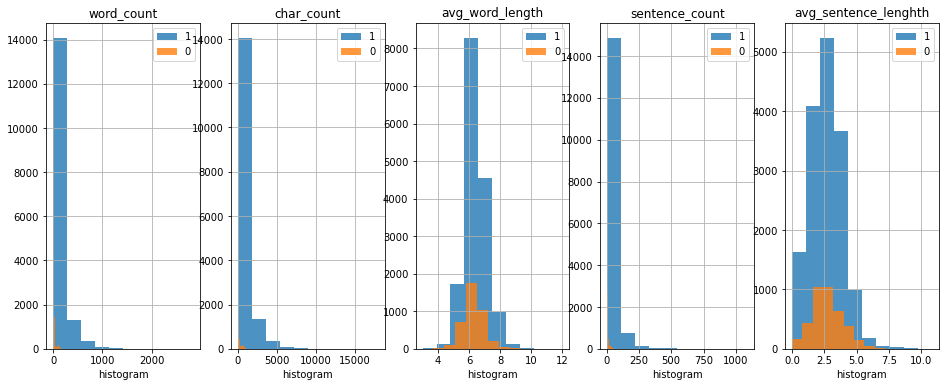

In [49]:
# visualize the distribution of the dataset
import seaborn as sns
x1,x2,x3,x4,x5,y = "word_count","char_count","avg_word_length","sentence_count","avg_sentence_length", "company_paticipants_yes"
fig, ax = plt.subplots(nrows=1, ncols=5,figsize=(16,6))
for i in model_df[y].unique():
    sns.distplot(model_df[model_df[y]==i][x1], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(model_df[model_df[y]==i][x2], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[1])
    sns.distplot(model_df[model_df[y]==i][x3], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[2])
    sns.distplot(model_df[model_df[y]==i][x4], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[3])
    sns.distplot(model_df[model_df[y]==i][x5], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[4])
ax[0].grid(True)
ax[0].legend(model_df[y].unique())
ax[0].set_title("word_count")
ax[1].grid(True)
ax[1].legend(model_df[y].unique())
ax[1].set_title("char_count")
ax[2].grid(True)
ax[2].legend(model_df[y].unique())
ax[2].set_title("avg_word_length")
ax[3].grid(True)
ax[3].legend(model_df[y].unique())
ax[3].set_title("sentence_count")
ax[4].grid(True)
ax[4].legend(model_df[y].unique())
ax[4].set_title("avg_sentence_lenghth")
plt.show()

## Topic Modelling

In [50]:
from collections import Counter, OrderedDict
from gensim.models import Phrases
import tomotopy as tp

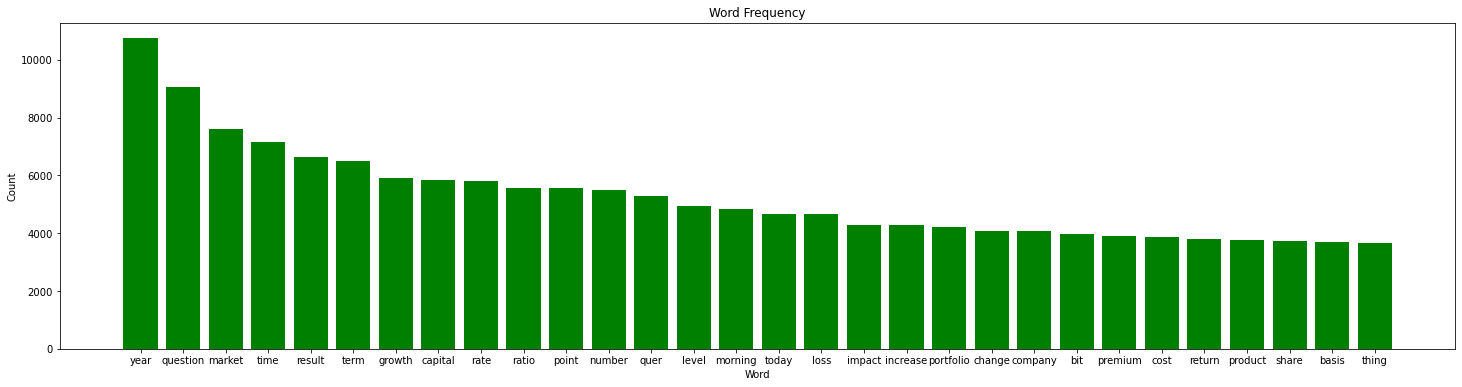

,word,freq
0,year,10746
1,question,9065
2,market,7602
3,time,7139
4,result,6622
...,...,...
8217,backout,1
8218,hinge,1
8219,millet,1
8220,faithph,1


In [51]:
temp_token = model_df['token'] # .apply(remove_brackets)
docs_tokens = []
for i in temp_token:
    docs_tokens.append(i)
    
# word frequency
# explore word frequencies
word_freq = Counter(x for xs in docs_tokens for x in set(xs)).most_common()
word_fr = pd.DataFrame(word_freq, columns=['word', 'freq']).sort_values(by='freq', ascending=False)

# visualize word frequencies
# figure size
fig = plt.figure(figsize=(25, 6))
plt.bar(word_fr.word[0:30], word_fr.freq[0:30], color='green')
plt.xlabel("Word")
plt.ylabel("Count")
plt.title("Word Frequency")
plt.show()
word_fr

In [52]:
# remove 50 most frequent words which is known in this context
word_list = word_fr.head(50)['word'].to_list()
mdy_list, tmp=[],[]
for review in docs_tokens:
    for word in review:
        if word not in word_list:
            tmp.append(word)
    mdy_list.append(tmp)
    tmp=[]

model_df['tokens'] = mdy_list

In [53]:
# topic modeling
common_terms = [
u"of",u"with",u"without",u"and",u"or",u"the",
u"a",u"not",u"be",u"to",u"this",u"who",u"in",
]

bigram = Phrases(                              
    docs_tokens,
    min_count=50,
    threshold=5,
    max_vocab_size=50000,
    common_terms=common_terms,
)
trigram = Phrases(                             
    bigram[docs_tokens],
    min_count=50,
    threshold=5,
    max_vocab_size=50000,
    common_terms=common_terms,
)
# anks to these two models, 
# we can process the tokenized documents and join the tokens associated with bi- or tri-grams.
docs_phrased = [trigram[bigram[line]] for line in docs_tokens]
# docs_phrased

In [54]:
len(docs_phrased)

19776

19776


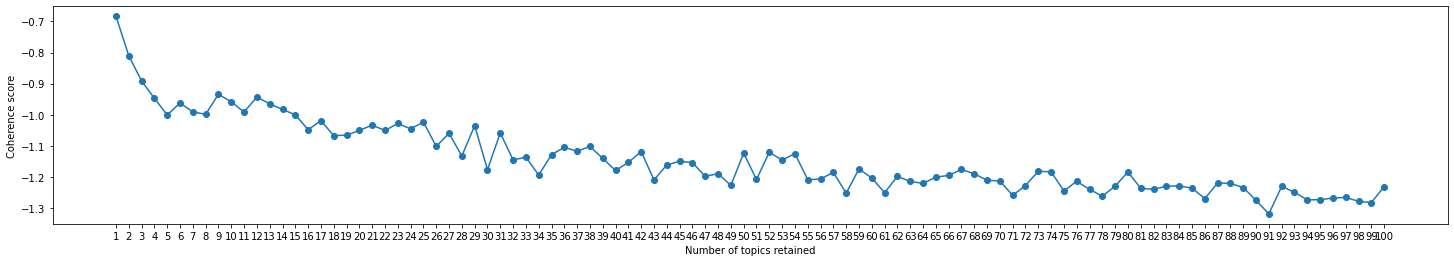

In [55]:
##### important!!! dont run this code ######

# With Tomotopy, it is necessary to wrap the preprocessed documents in a corpus-like object
# create corpus
corpus = tp.utils.Corpus()                   
for item in docs_phrased:                   
    if item != []:
        corpus.add_doc(words=item)
    else:
        corpus.add_doc(words=" ")
print(len(corpus))

# Explore the fit of surrogate models, i.e. models that retain different numbers of topics.
cvs = {}                                    # step 1 We create an empty dictionary to store the scores of different models.
for topic_number in range(1, 101, 1):        # step 2 We let the number of retained topics vary between models, and for each model we record the associated Coherence Score
    mdl = tp.LDAModel(k=topic_number, corpus=corpus) # our over all words
    for i in range(0, 100, 10): # 100 iterations
        mdl.train(10)
        # print("Iteration: {}\tLog-likelihood: {}".format(i, mdl.ll_per_word))
    coh = tp.coherence.Coherence(mdl, coherence="u_mass")
    cvs[topic_number] = coh.get_score() # lower is better

# plot the Coherence Score
fig = plt.figure(figsize=(25, 4))
ax = fig.add_subplot(111)
ax.plot(cvs.keys(), cvs.values(), "o-")
ax.set_xlabel("Number of topics retained")
ax.set_ylabel("Coherence score")
ax.set_xticks(range(1, 101, 1))
plt.show()

In [56]:
# Hence, we train our best fit model.
# 所以，我們訓練我們的最佳模型。
best_mdl = tp.LDAModel(k=91, corpus=corpus)
for i in range(0, 100, 10):
    best_mdl.train(10)
    # print("Iteration: {}\tLog-likelihood: {}".format(i, best_mdl.ll_per_word))
# Using the ‘get_topic_words’ attribute, 
# we retrieve the topic-to-word probabilities, 
# a key outcome of topic modeling. The estimated probabilities are arranged into a Pandas DF.
# 使用“get_topic_words”屬性，我們可以取得主題到詞彙概率的預測，這是主題建模的一個重要結果。
wt = pd.DataFrame()
for k in range(best_mdl.k):
    words, probs = [], []
    for word, prob in best_mdl.get_topic_words(k):
        words.append(word)
        probs.append(prob)
    tmp = pd.DataFrame(
        {
            "word": words,
            "prob": np.round(probs, 3),
            "k": np.repeat(k, len(words)),
            "sort": np.arange(0, len(words)),
        }
    )
    wt = pd.concat([wt, tmp], ignore_index=False)
    del tmp
wt #.head(1).T

,word,prob,k,sort
0,statement,0.105,0,0
1,result,0.055,0,1
2,company,0.040,0,2
3,today,0.035,0,3
4,factor,0.033,0,4
...,...,...,...,...
5,claim,0.018,90,5
6,process,0.017,90,6
7,experience,0.016,90,7
8,innovation,0.013,90,8


In [59]:
wt[wt['k']==2]

,word,prob,k,sort
0,year,0.051,2,0
1,industry,0.043,2,1
2,growth,0.042,2,2
3,auto,0.042,2,3
4,point,0.042,2,4
5,ratio,0.038,2,5
6,rate,0.036,2,6
7,action,0.034,2,7
8,month,0.025,2,8
9,condition,0.024,2,9


In [60]:
wt[wt['k']==3]

,word,prob,k,sort
0,cash,0.140,3,0
1,flow,0.048,3,1
2,capital,0.048,3,2
3,generation,0.039,3,3
4,divid,0.037,3,4
5,remittance,0.023,3,5
6,year,0.021,3,6
7,term,0.020,3,7
8,action,0.018,3,8
9,cost,0.017,3,9


In [71]:
td = pd.DataFrame(
    np.stack([doc.get_topic_dist() for doc in best_mdl.docs]),
    columns=["topic_{}".format(i + 1) for i in range(best_mdl.k)],
)
td #.head(1).T

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49,topic_50,topic_51,topic_52,topic_53,topic_54,topic_55,topic_56,topic_57,topic_58,topic_59,topic_60,topic_61,topic_62,topic_63,topic_64,topic_65,topic_66,topic_67,topic_68,topic_69,topic_70,topic_71,topic_72,topic_73,topic_74,topic_75,topic_76,topic_77,topic_78,topic_79,topic_80,topic_81,topic_82,topic_83,topic_84,topic_85,topic_86,topic_87,topic_88,topic_89,topic_90,topic_91
0,0.000149,0.000198,0.000150,0.000399,0.000357,0.000175,0.000134,0.000193,0.000415,0.000710,0.000184,0.000602,0.000265,0.008255,0.259221,0.000129,0.000159,0.000153,0.000352,0.063077,0.000441,0.000659,0.000181,0.000219,0.000366,0.000357,0.023773,0.047513,0.000183,0.000141,0.000133,0.000239,0.000243,0.001091,0.000379,0.000189,0.000120,0.000342,0.000085,0.000206,0.071363,0.000350,0.000375,0.047401,0.000196,0.000293,0.000267,0.118030,0.000222,0.000395,0.000182,0.000429,0.000229,0.000182,0.000096,0.000508,0.000303,0.000448,0.000427,0.000063,0.047307,0.000229,0.078729,0.000264,0.008201,0.000218,0.000227,0.000115,0.000149,0.000130,0.000689,0.055268,0.000153,0.000350,0.000540,0.000158,0.000213,0.000135,0.000210,0.000578,0.000243,0.000134,0.000172,0.000251,0.149431,0.000236,0.000190,0.000316,0.000427,0.000491,0.000352
1,0.000072,0.000096,0.000073,0.000193,0.057106,0.038040,0.000065,0.000093,0.011587,0.000344,0.007680,0.015474,0.000128,0.000198,0.060890,0.000062,0.000077,0.000074,0.000170,0.000153,0.000213,0.000319,0.000087,0.000106,0.000177,0.000173,0.000115,0.000214,0.000089,0.000068,0.000064,0.015298,0.000117,0.008119,0.000183,0.136730,0.000058,0.000165,0.000041,0.000100,0.080072,0.003965,0.000182,0.000160,0.000095,0.000142,0.000129,0.087468,0.000107,0.000191,0.000088,0.000207,0.000111,0.000088,0.000046,0.000246,0.000147,0.000217,0.000206,0.000030,0.000115,0.026679,0.000134,0.000128,0.000172,0.000105,0.000110,0.000055,0.000072,0.000063,0.000333,0.076081,0.000074,0.000169,0.353244,0.000077,0.000103,0.000065,0.007693,0.000279,0.000118,0.000065,0.000083,0.000121,0.000182,0.000114,0.000092,0.000153,0.004002,0.000238,0.000171
2,0.000175,0.000232,0.000177,0.000469,0.000420,0.000205,0.000157,0.027884,0.009707,0.000835,0.000216,0.009927,0.000311,0.000482,0.000393,0.000151,0.000187,0.000179,0.000414,0.000372,0.000519,0.000775,0.000212,0.000258,0.000430,0.000420,0.000279,0.037397,0.018654,0.000166,0.000157,0.000281,0.000285,0.001282,0.000445,0.424307,0.000141,0.000401,0.000099,0.000243,0.019329,0.000411,0.000441,0.000389,0.000231,0.000344,0.000313,0.000416,0.000261,0.000464,0.000214,0.000504,0.000269,0.000214,0.000112,0.000597,0.000356,0.000527,0.000501,0.000074,0.000278,0.120119,0.000327,0.055625,0.000419,0.000256,0.037144,0.000135,0.000176,0.000153,0.000810,0.000415,0.000179,0.000411,0.000634,0.000186,0.000251,0.000158,0.000247,0.000679,0.000286,0.000158,0.000203,0.212337,0.000441,0.000278,0.000223,0.000372,0.000501,0.000577,0.000414
3,0.000104,0.000137,0.000105,0.060233,0.000248,0.000121,0.000093,0.000134,0.000288,0.000494,0.000128,0.000419,0.000184,0.000285,0.000232,0.000089,0.000111,0.000106,0.000244,0.000220,0.000307,0.000458,0.000125,0.000152,0.000254,0.000248,0.016517,0.005758,0.152742,0.000098,0.000093,0.000166,0.000169,0.000758,0.000263,0.000131,0.000084,0.000237,0.000059,0.000143,0.000526,0.000243,0.000261,0.032933,0.000136,0.011104,0.000185,0.000246,0.000154,0.000275,0.000127,0.005748,0.000159,0.000126,0.000066,0.000353,0.109221,0.000311,0.000296,0.000044,0.000165,0.000159,0.000193,0.000183,0.338179,0.000151,0.000158,0.000080,0.000104,0.000090,0.000479,0.000245,0.000106,0.000243,0.000375,0.000110,0.000148,0.000094,0.000146,0.000401,0.00

In [72]:
# concat the model_df and td
model_df = pd.concat([model_df, td], axis=1)
model_df

,participants,file_name,date,idx,company_paticipants_yes,other_paticipants_yes,company_name,paraghrph,paraghrph_clean,paraghrph_noun,token,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length,tokens,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49,topic_50,topic_51,topic_52,topic_53,topic_54,topic_55,topic_56,topic_57,topic_58,topic_59,topic_60,topic_61,topic_62,topic_63,topic_64,topic_65,topic_66,topic_67,topic_68,topic_69,topic_70,topic_71,topic_72,topic_73,topic_74,topic_75,topic_76,topic_77,topic_78,topic_79,topic_80,topic_81,topic_82,topic_83,topic_84,topic_85,topic_86,topic_87,topic_88,topic_89,topic_90,topic_91
0,05HFRJ-E Denis Kessler,20151104_SCOR_SE-_Earnings_Call_2015-11-4_FS00...,2015-11-04,17.0,1.0,0.0,SCOR SE-,"Thank you very much, Bertrand Bougon. Good mor...",Thank you very much Good morning everyone I'...,morning quer light result rating agency q news...,"[morning, quer, light, result, rating, agency,...",124.0,837.0,42.0,6.750000,2.952381,"[light, rating, agency, news, regulator, inten...",0.000149,0.000198,0.000150,0.000399,0.000357,0.000175,0.000134,0.000193,0.000415,0.000710,0.000184,0.000602,0.000265,0.008255,0.259221,0.000129,0.000159,0.000153,0.000352,0.063077,0.000441,0.000659,0.000181,0.000219,0.000366,0.000357,0.023773,0.047513,0.000183,0.000141,0.000133,0.000239,0.000243,0.001091,0.000379,0.000189,0.000120,0.000342,0.000085,0.000206,0.071363,0.000350,0.000375,0.047401,0.000196,0.000293,0.000267,0.118030,0.000222,0.000395,0.000182,0.000429,0.000229,0.000182,0.000096,0.000508,0.000303,0.000448,0.000427,0.000063,0.047307,0.000229,0.078729,0.000264,0.008201,0.000218,0.000227,0.000115,0.000149,0.000130,0.000689,0.055268,0.000153,0.000350,0.000540,0.000158,0.000213,0.000135,0.000210,0.000578,0.000243,0.000134,0.000172,0.000251,0.149431,0.000236,0.000190,0.000316,0.000427,0.000491,0.000352
1,05HFRJ-E Denis Kessler,20190220_SCOR_SE-_Earnings_Call_2019-2-20_FS00...,2019-02-20,22.0,1.0,0.0,SCOR SE-,"Thank you, Ian, and good morning, everyone. In...",Thank you and good morning everyone In a year...,morning year force bull development ability sh...,"[morning, year, force, bull, development, abil...",260.0,1751.0,80.0,6.734615,3.250000,"[force, bull, ability, shock, sharehol, franch...",0.000072,0.000096,0.000073,0.000193,0.057106,0.038040,0.000065,0.000093,0.011587,0.000344,0.007680,0.015474,0.000128,0.000198,0.060890,0.000062,0.000077,0.000074,0.000170,0.000153,0.000213,0.000319,0.000087,0.000106,0.000177,0.000173,0.000115,0.000214,0.000089,0.000068,0.000064,0.015298,0.000117,0.008119,0.000183,0.136730,0.000058,0.000165,0.000041,0.000100,0.080072,0.003965,0.000182,0.000160,0.000095,0.000142,0.000129,0.087468,0.000107,0.000191,0.000088,0.000207,0.000111,0.000088,0.000046,0.000246,0.000147,0.000217,0.000206,0.000030,0.000115,0.026679,0.000134,0.000128,0.000172,0.000105,0.000110,0.000055,0.000072,0.000063,0.000333,0.076081,0.000074,0.000169,0.353244,0.000077,0.000103,0.000065,0.007693,0.000279,0.000118,0.000065,0.000083,0.000121,0.000182,0.000114,0.000092,0.000153,0.004002,0.000238,0.000171
2,0682QB-E Ulrich Wallin,20180507_Hannover_Rueck_SE-_Earnings_Call_2018...,2018-05-07,8.0,1.0,0.0,Hannover Rueck,"Thank you. Good morning, ladies and gentlemen....",Thank you Good morning ladies and gentlemen I'...,morning lady gentleman conference call result ...,"[morning, lady, gentleman, conference, result,...",106.0,610.0,50.0,5.754717,2.120000,"[lady, gentleman, conference, picipating, bank...",0.000175,0.000232,0.000177,0.000469,0.000420,0.000205,0.000157,0.027884,0.009707,0.000835,0.000216,0.009927,0.000311,0.000482,0.00039

In [74]:
# model df drop the token column (tokenized section is too large to save)
model_df_without_token = model_df.drop(['tokens'], axis=1)
# save to csv
model_df_without_token.to_csv('./main_df_output/topic_modelling_df_without_token.csv', index=False)

## Visualisation

In [75]:
# read the model_df_without_token.csv
model_df_without_token = pd.read_csv('./main_df_output/topic_modelling_df_without_token.csv')
